# **Bioinformatics Project - Computational Drug Discovery Comparing Regressors**

Sanket Palve
Thanks to Chanin Nantasenamat

['Data Professor' YouTube channel](http://youtube.com/dataprofessor)



## **1. Import libraries**

In [1]:
! pip install lazypredict

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## **2. Load the data set**


In [3]:
df = pd.read_csv('mycobacterium_tuberculosis_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [4]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [5]:
# Examine X dimension
X.shape

(1815, 881)

In [6]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(1815, 168)

In [7]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [8]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:37<00:00,  1.11it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 504
[LightGBM] [Info] Number of data points in the train set: 1452, number of used features: 168
[LightGBM] [Info] Start training from score 5.577555
'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 98%|█████████▊| 41/42 [00:37<00:00,  3.00it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 504
[LightGBM] [Info] Number of data points in the train set: 1452, number of used features: 168
[LightGBM] [Info] Start training from score 5.577555


100%|██████████| 42/42 [00:37<00:00,  1.11it/s]


In [9]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.97,0.97,0.28,0.13
ExtraTreeRegressor,0.97,0.97,0.28,0.08
ExtraTreesRegressor,0.97,0.97,0.28,3.21
GaussianProcessRegressor,0.97,0.97,0.28,0.91
XGBRegressor,0.96,0.97,0.30,0.29
MLPRegressor,0.93,0.94,0.43,2.85
RandomForestRegressor,0.92,0.93,0.44,3.37
BaggingRegressor,0.90,0.91,0.50,0.30
HistGradientBoostingRegressor,0.88,0.89,0.56,1.15


In [10]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.42,0.69,0.98,2.56
HistGradientBoostingRegressor,0.41,0.68,0.99,1.09
BaggingRegressor,0.38,0.67,1.02,0.29
LGBMRegressor,0.36,0.66,1.03,0.30
XGBRegressor,0.33,0.64,1.06,0.28
MLPRegressor,0.29,0.62,1.09,2.87
KNeighborsRegressor,0.19,0.56,1.16,0.04
SVR,0.16,0.55,1.19,0.37
NuSVR,0.16,0.55,1.19,0.31


## **5. Data visualization of model performance**

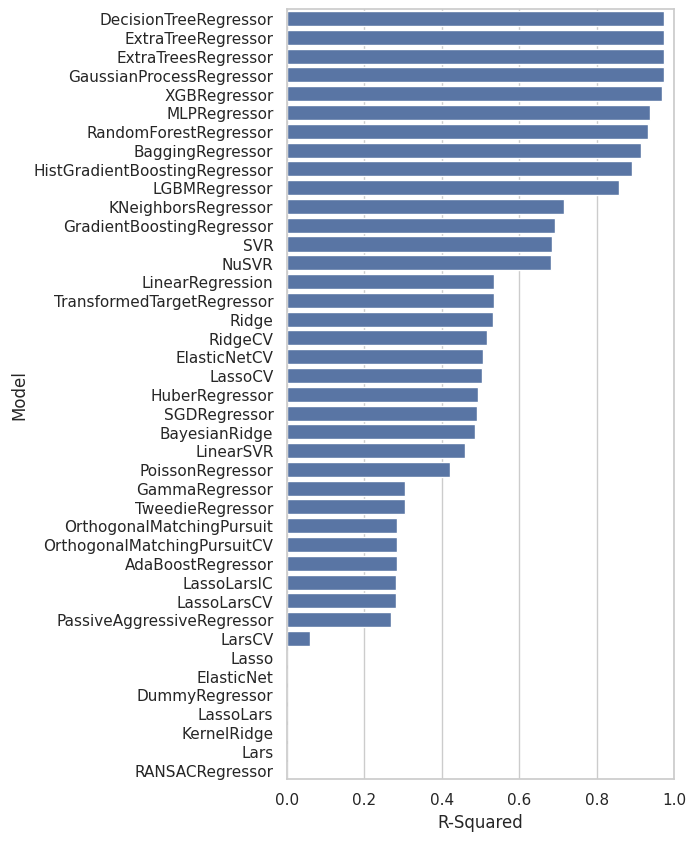

In [14]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))
plt.savefig('r_squared_train.png', dpi=300, bbox_inches='tight')

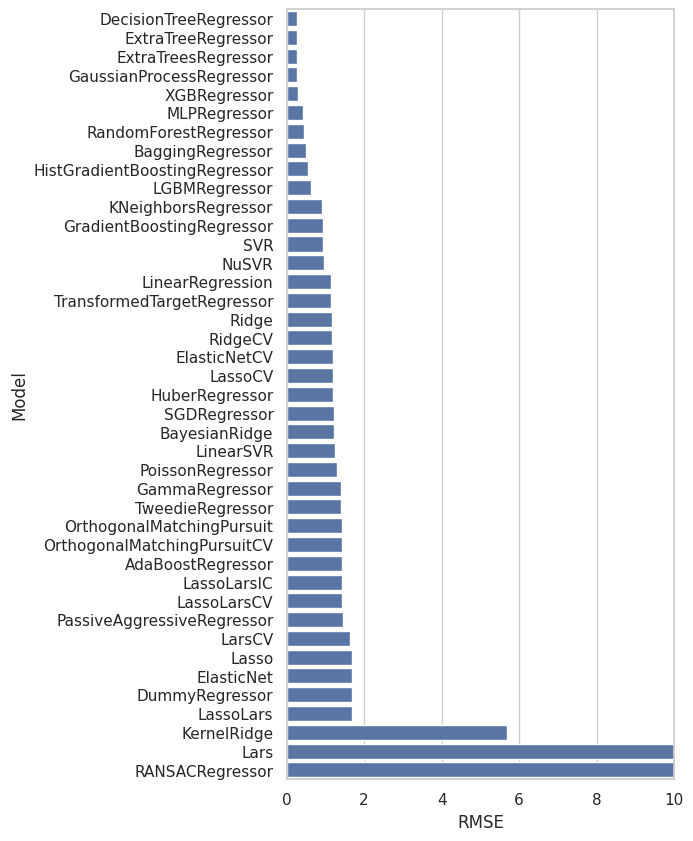

In [15]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))
plt.savefig('rmse_train.png', dpi=300, bbox_inches='tight')

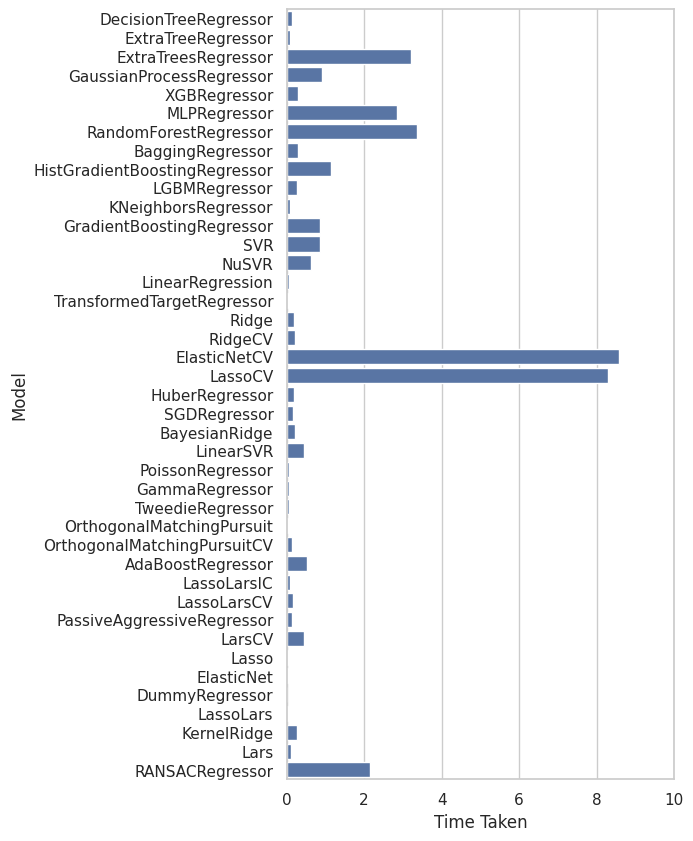

In [16]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))
plt.savefig('time_taken_train.png', dpi=300, bbox_inches='tight')

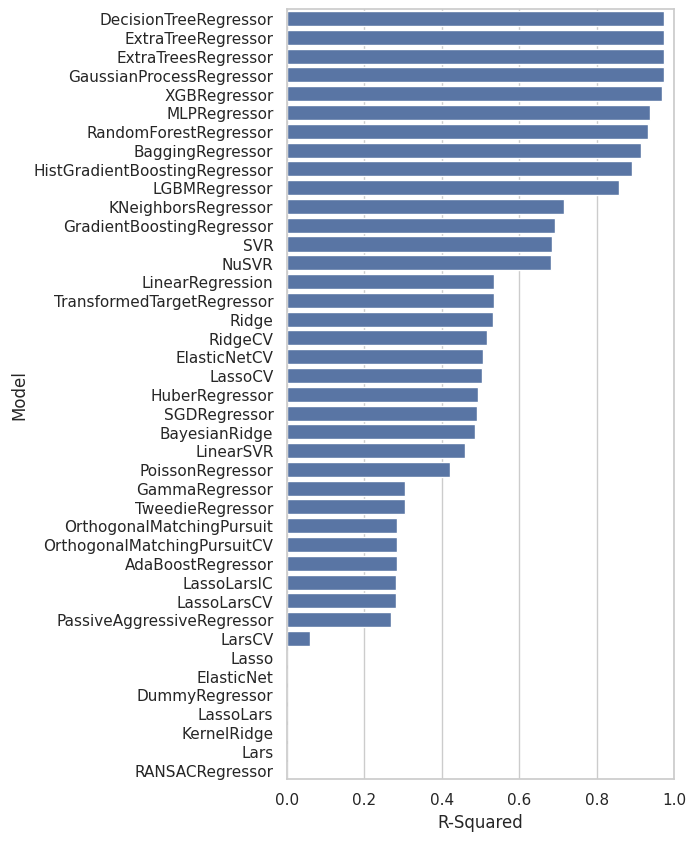

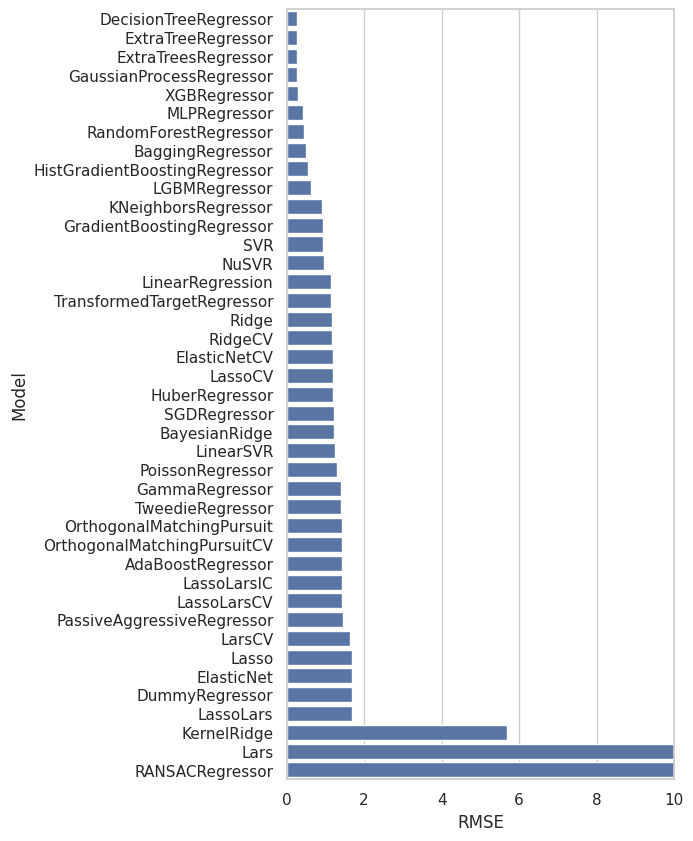

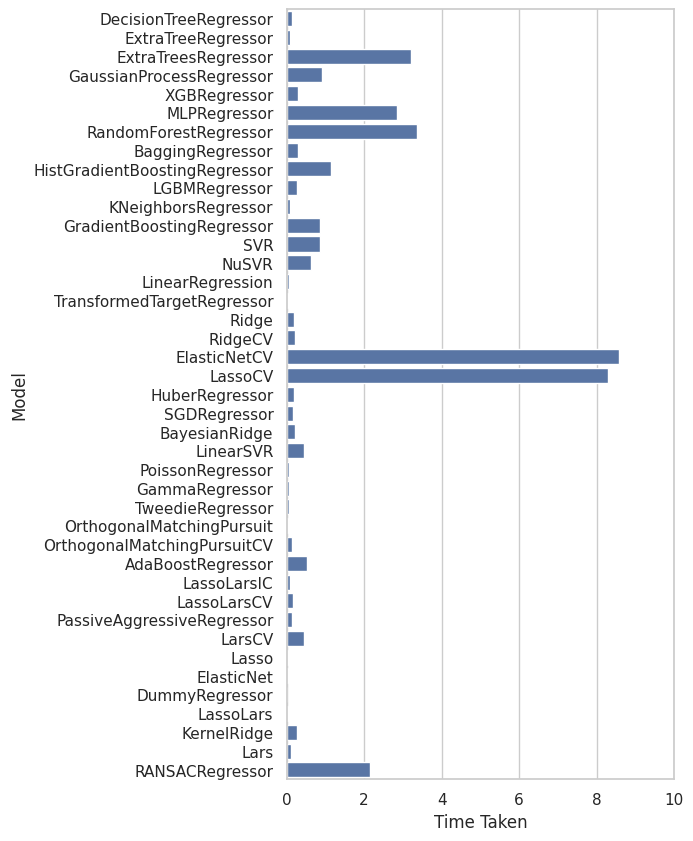

In [17]:
# prompt: Code to save all the data visualzations outputs obtained

import matplotlib.pyplot as plt
# Save the bar plot of R-squared values
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))
plt.savefig('r_squared_train.png', dpi=300, bbox_inches='tight')

# Save the bar plot of RMSE values
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))
plt.savefig('rmse_train.png', dpi=300, bbox_inches='tight')

# Save the bar plot of calculation time
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))
plt.savefig('time_taken_train.png', dpi=300, bbox_inches='tight')
